In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Métodos implementados

In [ ]:
def false_position(f,l,u,epsilon,maxiter=100):
  iter = 0
  err = 1
  x = None
  xra = float('+inf')

  while err > epsilon and iter < maxiter:
    x = (l*f(u) - u*f(l))/(f(u) - f(l))

    if f(l)*f(x) < 0:
      u = x
    elif f(x)*f(u) < 0:
      l = x
    elif f(l)*f(u) == 0:
      break
    else:
      raise Error('Some error')

    err = abs(x-xra)/abs(x)
    xra = x
    iter += 1

  return x, iter, err

In [ ]:
def fixed_point(f, x0, epsilon=1e-5, maxiter=100, a=1, gen_g=False):
  if gen_g:
    g = lambda x : x - a*f(x)
  else:
    g = f
  err = 1
  iter = 0
  x1 = None
  verro, vraiz = [], []

  while err > epsilon and iter < maxiter:
    x1 = g(x0)
    err = abs(x1-x0)/abs(x1)
    x0 = x1
    iter += 1
    verro.append(err)
    vraiz.append(x1)

  return verro, vraiz

## 1 – Encontre a menor raiz positiva da função $x^{2}|cos\sqrt{x}| = 5$ (x está em radianos) usando o método da falsa posição. Para localizar a região na qual estão as raízes, inicialmente trace a função para valores de x entre 0 e 5. Faça os cálculos até que εa fique abaixo de εs = 1%. Verifique sua resposta final substituindo-a na função original.

In [ ]:
f1 = lambda x : x**2*abs(np.cos(np.sqrt(x))) - 5

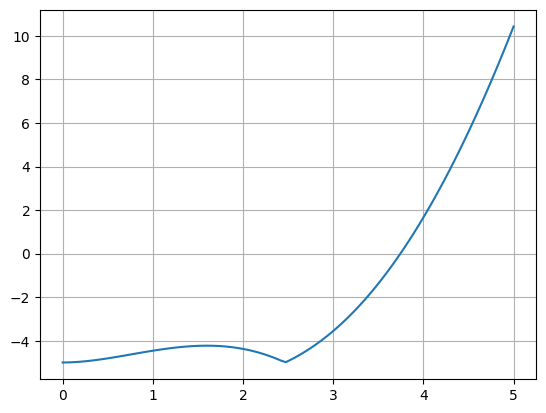

In [ ]:
x = np.linspace(0, 5, 100)
plt.plot(x, f1(x))
plt.grid()

In [ ]:
res = false_position(f1, 0, 5, 0.01)
print(res)

(3.7362819239727436, 6, 0.0063873108666538435)


## 2 - Água está escoando em um canal trapezoidal a uma vazão de Q=20m³/s. A profundidade crítica y para tal canal deve satisfazer a equação $0 = 1 - \frac{Q^{2}}{gA_c^{3}}B$ em que g = 9,81m/s², Ac é a área da seção transversal (m²), e B é a largura do canal na superfície (m). Para esse caso, a largura e a área transversal podem ser relacionadas à profundidade y por

## $B = 3 + y$

## $A_c = 3y + \frac{y^{2}}{2}$

## Encontre a profundidade crítica usando a falsa-posição. Use aproximações iniciais de $x_l=0,5$ e $x_u=2,5$. Itere até que o erro aproximado fique abaixo de 1% ou que o número de iterações ultrapasse 10.

In [ ]:
q = 20
g = 9.81
b = lambda y : 3 + y
ac = lambda y : 3*y + (y**2)/2
f2 = lambda y : 1 - (q**2)/(g*ac(y)**3) * b(y)

In [ ]:
f2(1.5)

-0.03094599866601211

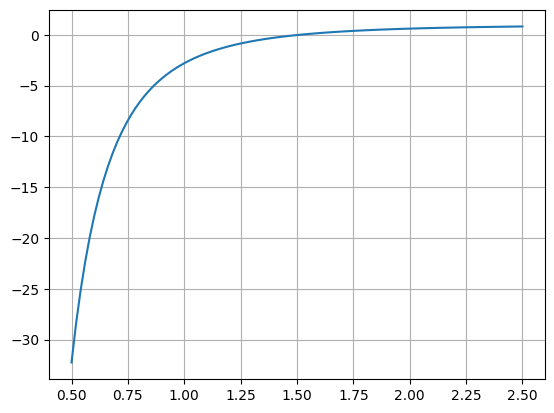

In [ ]:
x = np.linspace(0.5,2.5,100)
plt.plot(x,f2(x))
plt.grid()

In [ ]:
res = false_position(f2,0.5,2.5,0.001,100)
print(res)

(1.534732362527831, 61, 0.0009704065788129615)


## 3 – Considere o problema de encontrar o zero da função $f(x) = x.e^{x} - 10$. Uma maneira geral de construir um problema de ponto fixo equivalente é o seguinte:
## $f(x) = 0 \rightarrow \alpha f(x) = 0 \rightarrow x - \alpha f(x) = x$, para qualquer parâmetro $\alpha \neq 0$.
## Consideremos, então, as seguintes duas funções:
## $g_1(x) = x - 0,5.f(x)$ e $g_2(x) = x - 0,05.f(x)$

## Utilizando código em Python, construa as iterações de ponto fixo $x_1^{(n+1)} = g_1(x_1^{(n)})$ e $x_2^{(n+1)} = g_2(x_2^{(n)})$, tomando $x_1^{(1)} = x_2^{(1)} = 1,7$. Itere as respectivas funções e verifique a convergência.

In [ ]:
f3 = lambda x : x*np.exp(x) - 10
g1 = lambda x : x - 0.5*f3(x)
g2 = lambda x : x - 0.05*f3(x)

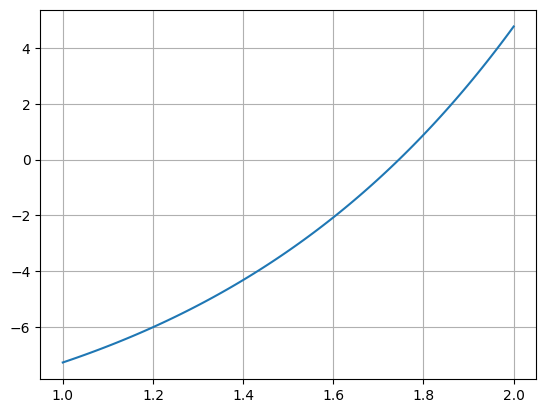

In [ ]:
x = np.linspace(1,2,100)
plt.plot(x,f3(x))
plt.grid()

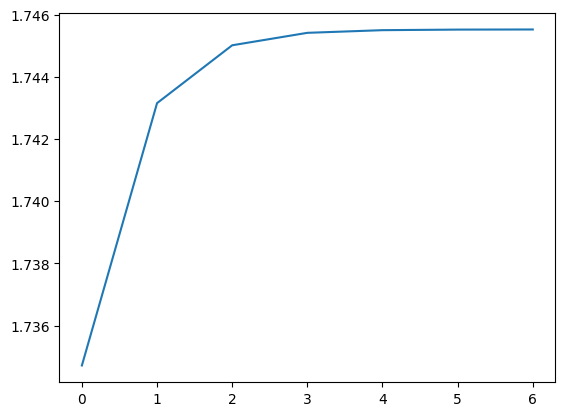

In [ ]:
res = fixed_point(f3, 1.7, 1e-5, 1000, 0.05)
plt.plot(res[1])

## 4) Mostre que a equação $x.e^{x} = 10$ é equivalente às seguintes equações:
## $x = ln\big(\frac{10}{x}\big)$ e $x = 10.e^{-x}$.
## Destas, considere as seguintes iterações de ponto fixo:
## $a) x^{(n+1)} = ln\big(\frac{10}{x^{(n)}}\big)$

## $b) x^{(n+1)} = 10.e^{-x^{(n)}}$

## Tomando x(1) = 1, verifique se estas sequências são convergentes.

In [ ]:
g1 = lambda x : np.log(10/x)
g2 = lambda x : 10*np.exp(-x)

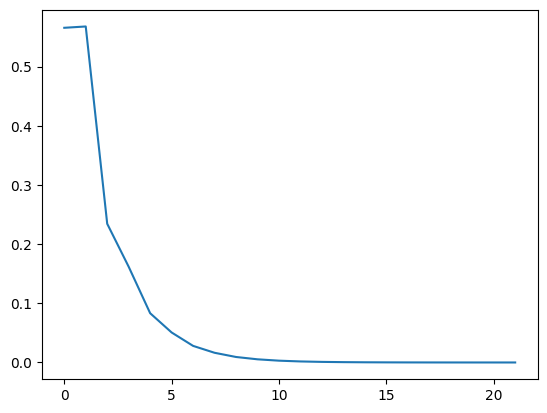

In [ ]:
res = fixed_point(g1, 1, maxiter=1000)
plt.plot(res[0])